In [1]:
import fastplotlib as fpl
import os
import sys
import masknmf
import tifffile
%load_ext autoreload

No windowing system present. Using surfaceless platform
No config found!
No config found!
Max vertex attribute stride unknown. Assuming it is 2048
Max vertex attribute stride unknown. Assuming it is 2048
Max vertex attribute stride unknown. Assuming it is 2048


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA TITAN RTX,DiscreteGPU,Vulkan,555.42.02
❗ limited,"llvmpipe (LLVM 12.0.0, 256 bits)",CPU,Vulkan,Mesa 21.2.6 (LLVM 12.0.0)
❌,NVIDIA TITAN RTX/PCIe/SSE2,Unknown,OpenGL,3.3.0 NVIDIA 555.42.02


Max vertex attribute stride unknown. Assuming it is 2048
Max vertex attribute stride unknown. Assuming it is 2048


In [2]:
data = tifffile.imread("/path/to/data.tiff")

# If you don't have a good template estimate, run the generic template estimation procedure. End result is a PiecewiseRigidRegistrationStrategy object, used to register all frames to a template

In [6]:
rigid_strategy = masknmf.RigidMotionCorrection(max_shifts = [5, 5])
pwrigid_strategy = masknmf.PiecewiseRigidMotionCorrection(strides = [30, 30],
                                                          overlaps = [5, 5],
                                                          max_rigid_shifts = [5, 5],
                                                          max_deviation_rigid = [2, 2])

pwrigid_strategy = masknmf.motion_correction.compute_template(data,
                                                              rigid_strategy,
                                                              num_iterations_piecewise_rigid = 1,
                                                              pwrigid_strategy = pwrigid_strategy,
                                                              device = "cpu",
                                                              batch_size = 1000)

# Define a RegistrationArray that lazily loads motion corrected frames of the raw data

In [4]:
moco_results = masknmf.RegistrationArray(data, pwrigid_strategy, device = "cpu")

# Visualize with fastplotlib imagewidget

RFBOutputContext()

Max vertex attribute stride unknown. Assuming it is 2048
/data/home/app2139/fastplotlib/fastplotlib/graphics/_features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
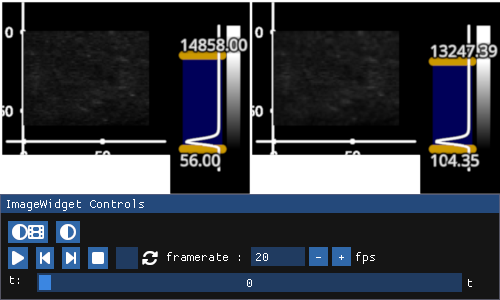

In [5]:
iw = fpl.ImageWidget(data = [data, moco_results])
iw.cmap = "gray"
iw.show()